In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import xml.etree.ElementTree as ET

# WP: Wahlperiode
# Quelle der Daten: 

In [3]:
DATA_PATH = Path('data')
MDB_XML_PATH = DATA_PATH / 'MDB_STAMMDATEN.XML'
DF_MDB_PATH = DATA_PATH / 'df_mdb.csv' #one row per individuum, one col per wp containing 0 / 1
DF_MDB_WP_PATH = DATA_PATH / 'df_mdb_wp.csv' # one row per individuum per wp, containting e.g. 12. so one abgeordneter who has been in parliament for several wp will receive one row per wp

# parse xml data into dataFrame / .csv fomat

In [4]:
def get_mdb_data(mdb_xml_path = MDB_XML_PATH):
    list_of_mdb = []
    MDB_STAMMDATEN = ET.parse(mdb_xml_path)
    root = MDB_STAMMDATEN.getroot()
    
    for mdb in root.findall('MDB'):
        mdb_dict = {}
        ID, NAMEN, BIOGRAFISCHE_ANGABEN, WAHLPERIODEN = mdb[0], mdb[1], mdb[2], mdb[3]

        mdb_dict['ID'] = ID.text
        mdb_dict['NACHNAME'] = NAMEN.find('NAME').find('NACHNAME').text  
        mdb_dict['VORNAME'] = NAMEN.find('NAME').find('VORNAME').text  

        #print(mdb.tag, mdb.text, mdb.findall('NACHNAME'))
        for element in BIOGRAFISCHE_ANGABEN:
            mdb_dict[element.tag] = element.text

        mdb_dict['ANZ_WAHLPERIODEN'] = len(list(WAHLPERIODEN))

        for wahlperiode in WAHLPERIODEN:
            mdb_dict[int(wahlperiode.find('WP').text)] = 1

        list_of_mdb.append(mdb_dict)
    return pd.DataFrame(list_of_mdb)

In [5]:
def get_mdb_wp_data(mdb_xml_path = MDB_XML_PATH):
    list_of_mdb = []
    MDB_STAMMDATEN = ET.parse(mdb_xml_path)
    root = MDB_STAMMDATEN.getroot()
    
    for mdb in root.findall('MDB'):
        mdb_dict = {}
        ID, NAMEN, BIOGRAFISCHE_ANGABEN, WAHLPERIODEN = mdb[0], mdb[1], mdb[2], mdb[3]

        mdb_dict['ID'] = ID.text
        mdb_dict['NACHNAME'] = NAMEN.find('NAME').find('NACHNAME').text  
        mdb_dict['VORNAME'] = NAMEN.find('NAME').find('VORNAME').text  

        #print(mdb.tag, mdb.text, mdb.findall('NACHNAME'))
        for element in BIOGRAFISCHE_ANGABEN:
            mdb_dict[element.tag] = element.text

        mdb_dict['ANZ_WAHLPERIODEN'] = len(list(WAHLPERIODEN))

        for wahlperiode in WAHLPERIODEN:
            # one seperate entry per wp
            mdb_dict = mdb_dict.copy()
            mdb_dict['WP']=int(wahlperiode.find('WP').text)
            list_of_mdb.append(mdb_dict)
    return pd.DataFrame(list_of_mdb)

In [6]:
df_mdb = get_mdb_data(MDB_XML_PATH)
print(df_mdb.shape)
df_mdb.head()

(4089, 34)


,ID,NACHNAME,VORNAME,GEBURTSDATUM,GEBURTSORT,GEBURTSLAND,STERBEDATUM,GESCHLECHT,FAMILIENSTAND,RELIGION,...,2,12,13,14,15,16,1,17,18,19
0,11000001,Abelein,Manfred,20.10.1930,Stuttgart,None,17.01.2008,männlich,keine Angaben,katholisch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11000002,Achenbach,Ernst,09.04.1909,Siegen,None,02.12.1991,männlich,"verheiratet, 3 Kinder",evangelisch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11000003,Ackermann,Annemarie,26.05.1913,Parabutsch,Jugoslawien,18.02.1994,weiblich,"verheiratet, 5 Kinder",katholisch,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11000004,Ackermann,Else,06.11.1933,Berlin,None,14.09.2019,weiblich,ledig,evangelisch,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11000005,Adam,Ulrich,09.06.1950,"Teterow, Kr. Teterow, Bezirk Neubrandenburg",None,None,männlich,"verheiratet, 2 Kinder",evangelisch,...,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [7]:
df_mdb_wp = get_mdb_wp_data()
print(df_mdb_wp.shape)

(11627, 16)


In [8]:
df_mdb_wp[df_mdb_wp.NACHNAME == 'Merkel']

,ID,NACHNAME,VORNAME,GEBURTSDATUM,GEBURTSORT,GEBURTSLAND,STERBEDATUM,GESCHLECHT,FAMILIENSTAND,RELIGION,BERUF,PARTEI_KURZ,VITA_KURZ,VEROEFFENTLICHUNGSPFLICHTIGES,ANZ_WAHLPERIODEN,WP
4588,11001478,Merkel,Angela,17.07.1954,Hamburg,None,None,weiblich,verheiratet,evangelisch,"Bundeskanzlerin, Dipl.-Physikerin",CDU,1973 Abitur in Templin. Physikstudium Univ. Le...,4 Funktionen in Körperschaften und Anstalten d...,8,12
4589,11001478,Merkel,Angela,17.07.1954,Hamburg,None,None,weiblich,verheiratet,evangelisch,"Bundeskanzlerin, Dipl.-Physikerin",CDU,1973 Abitur in Templin. Physikstudium Univ. Le...,4 Funktionen in Körperschaften und Anstalten d...,8,13
4590,11001478,Merkel,Angela,17.07.1954,Hamburg,None,None,weiblich,verheiratet,evangelisch,"Bundeskanzlerin, Dipl.-Physikerin",CDU,1973 Abitur in Templin. Physikstudium Univ. Le...,4 Funktionen in Körperschaften und Anstalten d...,8,14
4591,11001478,Merkel,Angela,17.07.1954,Hamburg,None,None,weiblich,verheiratet,evangelisch,"Bundeskanzlerin, Dipl.-Physikerin",CDU,1973 Abitur in Templin. Physikstudium Univ. Le...,4 Funktionen in Körperschaften und Anstalten d...,8,15
4592,11001478,Merkel,Angela,17.07.1954,Hamburg,None,None,weiblich,verheiratet,evangelisch,"Bundeskanzlerin, Dipl.-Physikerin",CDU,1973 Abitur in Templin. Physikstudium Univ. Le...,4 Funktionen in Körperschaften und Anstalten d...,8,16
4593,11001478,Merkel,Angela,17.07.1954,Hamburg,None,None,weiblich,verheiratet,evangelisch,"Bundeskanzlerin, Dipl.-Physikerin",CDU,1973 Abitur in Templin. Physikstudium Univ. Le...,4 Funktionen in Körperschaften und Anstalten d...,8,17
4594,11001478,Merkel,Angela,17.07.1954,Hamburg,None,None,weiblich,verheiratet,evangelisch,"Bundeskanzlerin, Dipl.-Physikerin",CDU,1973 Abitur in Templin. Physikstudium Univ. Le...,4 Funktionen in Körperschaften und Anstalten d...,8,18
4595,11001478,Merkel,Angela,17.07.1954,Hamburg,None,None,weiblich,verheiratet,evangelisch,"Bundeskanzlerin, Dipl.-Physikerin",CDU,1973 Abitur in Templin. Physikstudium Univ. Le...,4 Funktionen in Körperschaften und Anstalten d...,8,19
9794,11003591,Merkel,Petra,18.09.1947,Berlin,None,None,weiblich,"geschieden, 1 Kind",evangelisch,Kaufmännische Angestellte,SPD,None,None,3,15
9795,11003591,Merkel,Petra,18.09.1947,Berlin,None,None,weiblich,"geschieden, 1 Kind",evangelisch,Kaufmännische Angestellte,SPD,None,None,3,16


# clean data

In [27]:
# ok, quite expected. some cleaning necessarry: 'BÜNDNIS 90/DIE GRÜNEN', 'DIE GRÜNEN/BÜNDNIS 90', 'GRÜNE'
for grünen_alias in ['BÜNDNIS 90/DIE GRÜNEN', 'DIE GRÜNEN/BÜNDNIS 90', 'GRÜNE']:
    df_mdb.replace(grünen_alias, 'DIE GRÜNEN', inplace=True)
    df_mdb_wp.replace(grünen_alias, 'DIE GRÜNEN', inplace=True)

In [28]:
# number of different jobs: 2k
len(set(df_mdb_wp.BERUF))

2201

In [215]:
df_mdb_wp['BERUF_MAPPED'] = df_mdb_wp['BERUF'].copy()

In [216]:
df_mdb_wp[['ID', 'BERUF']].groupby('BERUF').count().sort_values(by='ID', ascending=False).head(16)

,ID
BERUF,
Rechtsanwalt,567
Geschäftsführer,223
Landwirt,212
Angestellter,190
Rechtsanwalt und Notar,126
Journalist,117
Dipl.-Ingenieur,109
Kaufmann,104
Jurist,102


In [252]:
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace('Wirtschafts- und Sozialwissenschaftler', 'Wirtschaftswissenschaftler')


# leere einträge durch <unbekannt> ersetzen
df_mdb_wp.BERUF_MAPPED.fillna('unbekannt', inplace=True)

# Geschäftsführer, Parl. Staatssekretär => Geschäftsführer, Rechtsanwalt, Parl. Staatssekretär a. D.' = 'Rechtsanwalt'
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.apply(lambda beruf: beruf.split(',')[0])

#Bäckermeister und Konditor  => Bäckermeister, Rechtsanwalt und Fachanwalt für Steuerrecht  => Rechtsanwalt
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.apply(lambda beruf: beruf.split(' und ')[0])

# Kaufmann / Informatiker => Kaufmann
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.apply(lambda beruf: beruf.split(' / ')[0])

# Dipl.-Kaufmann => Kaufmann, Dipl.-Ingenieur => Ingenieur usw
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace('Dipl.-', '')
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace('Diplom-', '')
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace('Diplom ', '')
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' (FH)', '')
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' (FH)', '')
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' (BA)', '')
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' (B. A.)', '')
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' (MBA)', '')
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' (M. Sc.)', '')
 
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' a. D.', '')
df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' i. R.', '')

len(set(df_mdb_wp.BERUF_MAPPED))

<ipython-input-252-cec2a1083cdc>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace('Dipl.-', '')
<ipython-input-252-cec2a1083cdc>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' (FH)', '')
<ipython-input-252-cec2a1083cdc>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' (FH)', '')
<ipython-input-252-cec2a1083cdc>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_MAPPED.str.replace(' (BA)', '')
<ipython-input-252-cec2a1083cdc>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  df_mdb_wp.BERUF_MAPPED = df_mdb_wp.BERUF_M

1151

In [288]:
df_mdb_wp.BERUF_MAPPED.replace(['Rechtsanwalt', 'Rechtsanwältin', 'Jurist', 'Juristin', 'Oberstaatsanwalt', 'Oberstaatsanwältin',
                                'Rechtsanwalt und Notar', 'Richter', 'Richterin'], 'Jurist*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Landwirt', 'Landwirtin', 'Landwirtschaftsmeister', 'Landwirtschaftsmeisterin', 'Bauer', 
                                'Agraringenieur', 'Agraringenieurin', 'Land- und Forstwirt'], 'Landwirt[schaftsmeister]*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Geschäftsführer', 'Geschäftsführerin', 'Unternehmer', 'Unternehmerin'], 'Geschäftsführer*in/Unternehmer*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Angestellter', 'Angestellte'], 'Angestellt[e]', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Journalist', 'Journalistin', 'Redakteur', 'Redakteurin', 'Wirtschaftsjurist', 'Wirtschaftsjuristin'], 'Journalist*in / Redakteur*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Lehrer', 'Lehrerin', 'Erzieherin', 'Erzieher', 'Studienrat', 'Studienrätin', 'Lehrer am katholischen Gymnasium Ravensburg',
                                'Realschullehrer', 'Realschullehrerin', 'Oberlehrer', 'Gymnasiallehrerin', 'Gymnasiallehrer','Hauptschullehrerin', 'Hauptschullehrer',
                                'Grund - u. Hauptschullehrer',
                                'Berufsschullehrer', 'Berufsschullehrerin', 'Sportlehrerin', 'Sportlehrer',
                                'Oberstudienrat', 'Oberstudienrätin', 'Oberstudienrat a. D.', 
                                'Rektor', 'Rektor a. D.', 'Rektorin a. D.',
                                'Pädagoge', 'Pädagogin', 'Sozialpädagogin', 'Sozialpädagoge'], 'Lehrer*in / Rektor*in [a. D.]', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Kaufmann', 'Kauffrau', 'Bürokauffrau', 'Bürokaufmann', 'Versicherungskaufmann', 'Versicherungskauffrau',
                                'Industriekaufmann', 'Industriekauffrau', 'Kaufmännischer Angestellter', 'Bankkaufmann', 'Bankkauffrau'], '[Industrie]Kaufmann/-frau', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Volkswirt', 'Volkswirtin'], 'Volkswirtin*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Ingenieur', 'Ingenieurin', 'Ingenieur (FH)', 'Ingenieurin (FH)'], 'Ingenieur*in', inplace=True)

# hihi gibt es nicht df_mdb_wp.BERUF_MAPPED.replace(['Hausfrau', 'Hausmann'], 'Hausfrau/-mann', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Vizepräsident DBT', 'Vizepräsidentin DBT'], 'Vizepräsident*in DBT', inplace=True)

df_mdb_wp.BERUF_MAPPED.replace(['Bundesminister', 'Bundesministerin', 'Bundesminister a. D.'], 'Bundesminister*in [a. D.]', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Gewerkschaftssekretär', 'Gewerkschaftssekretärin'], 'Gewerkschaftssekretär*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Bürgermeister', 'Bürgermeisterin', 'Oberbürgermeister', 'Oberbürgermeisterin',
                               'Amtsbürgermeister', 'Amtsbürgermeisterin', '1. Bürgermeister', '1. Bürgermeisterin',
                               'Bezirksbürgermeister', 'Bezirksbürgermeisterin', 'Erster Bürgermeister  '], 'Bürgermeister*in [a. D.]', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Staatsminister', 'Staatsministerin', 'Staatsminister a. D.', 'Staatsminister a. D.'], 'Staatsminister*in [a. D.]', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Regierungsdirektor', 'Regierungsdirektorin', 'Regierungsdirektor a. D.', 'Regierungsdirektorin a. D.'], 'Regierungsdirektor*in [a. D.]', inplace=True)
# unnötig df_mdb_wp.BERUF_MAPPED.replace(['Fabrikant', 'Fabrikantin'], 'Fabrikant*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Professor', 'Professorin', 'Universitätsprofessor', 'Universitätsprofessorin', 'Hochschullehrer', 'Hochschullehrerin'], 'Professor*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Arzt', 'Ärztin'], 'Arzt/ Ärztin', inplace=True)

df_mdb_wp.BERUF_MAPPED.replace(['Landrat', 'Landrätin', 'Landrat a. D.', 'Landrätin a. D.'], 'Landrat/rätin [a. D.]', inplace=True)
# unnötig df_mdb_wp.BERUF_MAPPED.replace(['Pfarrer', 'Pfarrerin'], 'Pfarrer*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Betriebswirt', 'Betriebswirtin'], 'Betriebswirt*in', inplace=True)

df_mdb_wp.BERUF_MAPPED.replace(['Oberregierungsrat', 'Oberregierungsrätin', 'Regierungsrat', 'Regierungsrätin'], '[Ober]Regierungsrat*in', inplace=True)

df_mdb_wp.BERUF_MAPPED.replace(['Politologe', 'Politologin', 'Politikwissenschaftler', 'Politikwissenschaftler', 'Historiker', 'Historikerin', 
                                'Soziologe', 'Soziologin', 'Sozialwissenschaftler', 'Sozialwissenschaftlerin'], 'Geisteswissenschaftler*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Chemiker', 'Chemikerin', 'Physiker', 'Physikerin', 'Biologe', 'Biologin', 'Mathematiker', 'Mathematikerin'], 'Naturwissenschaftler*in', inplace=True)

df_mdb_wp.BERUF_MAPPED.replace(['Werkzeugmacher', 'Ingenieur (FH) für Maschinenbau Werkzeugmacher'], 'Werkzeugmacher', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Schriftsetzer', 'Schriftsetzerin'], 'Schriftsetzer*in', inplace=True)

df_mdb_wp.BERUF_MAPPED.replace(['Bäckermeister', 'Bäckerm.', 'Bäcker', 'Bäckerin', 'Bäcker- u. Konditormeister', 'selbstständiger Bäckermeister'], 'Bäcker*in', inplace=True)
df_mdb_wp.BERUF_MAPPED.replace(['Publizist', 'Publizistin', 'Verleger', 'Verlagsleiter'], 'Publizist*in', inplace=True)



df_mdb_wp[['ID', 'BERUF_MAPPED']].groupby('BERUF_MAPPED').count().sort_values(by='ID', ascending=False)[32:48]

,ID
BERUF_MAPPED,
Schriftsetzer*in,39
Naturwissenschaftler*in,38
Verwaltungsangestellter,37
Landrat/rätin [a. D.],36
Ökonom,34
Verwaltungswirt,34
Oberstudiendirektor,33
Verwaltungswirt (FH),31
Ministerialrat,29


In [299]:
df_mdb_wp[df_mdb_wp.BERUF.str.contains('Pflege', na=False)].BERUF_MAPPED.value_counts()

Oberin    1
Name: BERUF_MAPPED, dtype: int64

<AxesSubplot:xlabel='BERUF_MAPPED'>

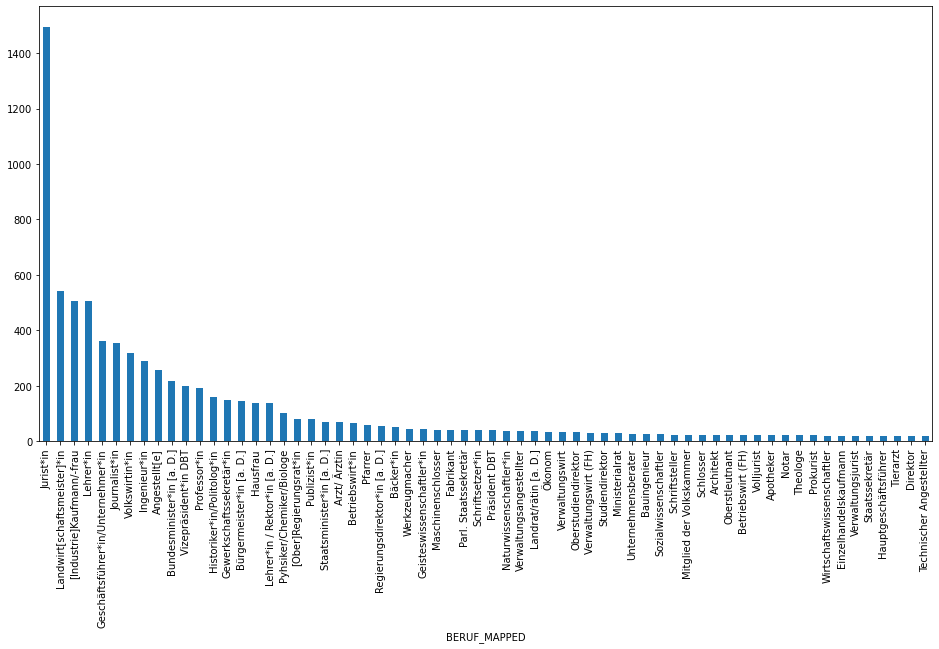

In [286]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
df_mdb_wp.groupby('BERUF_MAPPED')['ID'].count().sort_values(ascending=False)[:64].plot(kind='bar')


In [282]:
df_mdb['BERUF_MAPPED'] = df_mdb_wp.BERUF_MAPPED.copy()

# save as csv

In [172]:
df_mdb.to_csv(DF_MDB_PATH, index=None)
df_mdb_wp.to_csv(DF_MDB_WP_PATH, index=None)

# read in data. exploratory data analysis

In [136]:
df_mdb = pd.read_csv(DF_MDB_PATH, index_col=None)

In [137]:
df_mdb.columns

Index(['ID', 'NACHNAME', 'VORNAME', 'GEBURTSDATUM', 'GEBURTSORT',
       'GEBURTSLAND', 'STERBEDATUM', 'GESCHLECHT', 'FAMILIENSTAND', 'RELIGION',
       'BERUF', 'PARTEI_KURZ', 'VITA_KURZ', 'VEROEFFENTLICHUNGSPFLICHTIGES',
       'ANZ_WAHLPERIODEN', '5', '6', '7', '8', '9', '10', '11', '3', '4', '2',
       '12', '13', '14', '15', '16', '1', '17', '18', '19'],
      dtype='object')

In [138]:
df_mdb.tail()

,ID,NACHNAME,VORNAME,GEBURTSDATUM,GEBURTSORT,GEBURTSLAND,STERBEDATUM,GESCHLECHT,FAMILIENSTAND,RELIGION,...,2,12,13,14,15,16,1,17,18,19
4084,11004958,Nölke,Matthias,08.01.1980,Kassel,NaN,NaN,männlich,ledig,konfessionslos,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4085,11004959,Martin,Dorothee,21.01.1978,NaN,NaN,NaN,weiblich,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4086,11004960,Wetzel,Wolfgang,11.05.1968,Schlema,NaN,NaN,männlich,"verheiratet, 2 Kinder",römisch-katholisch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4087,11004961,Natterer,Christian,19.02.1981,Tettnang / Deutschland,NaN,NaN,männlich,"verheiratet, 1 Kind",römisch-katholisch,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4088,11004962,Dahmen,Janosch,06.09.1981,NaN,NaN,NaN,männlich,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [139]:
df_mdb_wp[['ID', 'PARTEI_KURZ']].groupby('PARTEI_KURZ').count().sort_values(by='ID', ascending=False).head(10)

,ID
PARTEI_KURZ,
SPD,4250
CDU,4150
FDP,1036
CSU,993
DIE GRÜNEN,536
DIE LINKE.,297
AfD,90
PDS,77
Plos,41


In [140]:
# wie - nur 2 Geschlechter? for the records: heute ist der 02.05.2021
df_mdb_wp[['ID', 'GESCHLECHT']].groupby('GESCHLECHT').count().sort_values(by='ID', ascending=False).head()

,ID
GESCHLECHT,
männlich,9382
weiblich,2245


In [141]:
# auch hier: such diversity. wow
df_mdb_wp[['ID', 'RELIGION']].groupby('RELIGION').count().sort_values(by='ID', ascending=False).head(n=16)

,ID
RELIGION,
evangelisch,3406
ohne Angaben,3275
katholisch,2985
römisch-katholisch,831
evangelisch-lutherisch,366
konfessionslos,234
evangelisch-reformiert,34
Atheistin,12
Islam,9


In [142]:
# jetzt wirds richtig vielseitig. so viele Busfahrer und Krankenschwestern!
df_mdb_wp[['ID', 'BERUF']].groupby('BERUF').count().sort_values(by='ID', ascending=False).head(16).head(16)

,ID
BERUF,
Rechtsanwalt,567
Geschäftsführer,223
Landwirt,212
Angestellter,190
Rechtsanwalt und Notar,126
Journalist,117
Dipl.-Ingenieur,109
Kaufmann,104
Jurist,102


In [143]:
# gehen sie weiter. hier gibt es kein Klischee zu erkennen!
df_mdb_wp[['ID', 'FAMILIENSTAND']].groupby('FAMILIENSTAND').count().sort_values(by='ID', ascending=False).head(16)

,ID
FAMILIENSTAND,
"verheiratet, 2 Kinder",2726
"verheiratet, 3 Kinder",1816
verheiratet,1720
"verheiratet, 1 Kind",1365
keine Angaben,1043
"verheiratet, 4 Kinder",891
ledig,424
"verheiratet, 5 Kinder",329
"verheiratet, 6 Kinder",178


In [144]:
# deleteme
start_date=16
end_date=18
#wps = range(start_date, end_date)
#selected_df = pd.concat([df_mdb[df_mdb[str(i)] == 1] for i in range(start_date,end_date+1)]).drop_duplicates()# deleteme
selected_df = df_mdb_wp[(df_mdb_wp['WP']>= start_date) & (df_mdb_wp['WP']<= end_date)].sort_values(by='VEROEFFENTLICHUNGSPFLICHTIGES')
selected_df.head()

,ID,NACHNAME,VORNAME,GEBURTSDATUM,GEBURTSORT,GEBURTSLAND,STERBEDATUM,GESCHLECHT,FAMILIENSTAND,RELIGION,BERUF,PARTEI_KURZ,VITA_KURZ,VEROEFFENTLICHUNGSPFLICHTIGES,ANZ_WAHLPERIODEN,WP,BERUF_MAPPED
11306,11004450,Zech,Tobias,09.07.1981,Trostberg,None,None,männlich,"verheiratet, 2 Kinder",römisch-katholisch,Geschäftsführer,CSU,1994/98 Wirtschaftsschule Mühldorf. 1998/2000 ...,1 Berufliche Tätigkeit vor der Mitgliedschaft ...,2,18,Geschäftsführer*in
10950,11004229,Reinhold,Hagen,23.03.1978,Wismar,None,None,männlich,3 Kinder,konfessionslos,Meister im Maurer- und Betonbauerhandwerk,FDP,"1994/97 Ausbildung zum Maurer und Betonbauer, ...",1 Berufliche Tätigkeit vor der Mitgliedschaft ...,2,17,Meister im Maurer- und Betonbauerhandwerk
10491,11004004,Aumer,Peter,17.04.1976,Regensburg,None,None,männlich,ledig,römisch-katholisch,Dipl.-Betriebswirt (FH),CSU,Berufsausbildung zum Steuerfachgehilfen. Studi...,1 Berufliche Tätigkeit vor der Mitgliedschaft ...,2,17,Betriebswirt (FH)
10886,11004179,Vogel,Johannes,29.04.1982,Wermelskirchen,None,None,männlich,verheiratet,evangelisch,Politikwissenschaftler,FDP,2001 Abitur am Städtischen Gymnasium Wermelski...,1 Berufliche Tätigkeit vor der Mitgliedschaft ...,2,17,Politikwissenschaftler
11171,11004371,Paschke,Markus,08.06.1963,Bremen,None,None,männlich,verheiratet,ohne Angaben,Gewerkschaftssekretär,SPD,Gymnasium in Bremen. 1980/83 Ausbildung zum In...,1 Berufliche Tätigkeit vor der Mitgliedschaft ...,2,18,Gewerkschaftssekretär*in


In [146]:
# deleteme
# keep occurences
NUM_DIM_KEEP = 8
values_to_keep = selected_df[['ID', 'FAMILIENSTAND']].groupby('FAMILIENSTAND').count().sort_values(by='ID', ascending=False).index[NUM_DIM_KEEP:2*NUM_DIM_KEEP]
values_to_keep

Index(['geschieden, 2 Kinder', '1 Kind', 'ledig, 1 Kind',
       'verheiratet, 5 Kinder', '3 Kinder', 'geschieden, 1 Kind', '4 Kinder',
       'geschieden, 3 Kinder'],
      dtype='object', name='FAMILIENSTAND')

In [373]:
levels = [values_to_keep, range(start_date, end_date+1)]
levels

[Index(['geschieden, 2 Kinder', '1 Kind', 'ledig, 1 Kind',
        'verheiratet, 5 Kinder', '3 Kinder', 'geschieden, 1 Kind', '4 Kinder',
        'geschieden, 3 Kinder'],
       dtype='object', name='FAMILIENSTAND'),
 range(16, 19)]

In [374]:
new_index = pd.MultiIndex.from_product(levels, names=['FAMILIENSTAND', 'WP'])
new_index

MultiIndex([( 'geschieden, 2 Kinder', 16),
            ( 'geschieden, 2 Kinder', 17),
            ( 'geschieden, 2 Kinder', 18),
            (               '1 Kind', 16),
            (               '1 Kind', 17),
            (               '1 Kind', 18),
            (        'ledig, 1 Kind', 16),
            (        'ledig, 1 Kind', 17),
            (        'ledig, 1 Kind', 18),
            ('verheiratet, 5 Kinder', 16),
            ('verheiratet, 5 Kinder', 17),
            ('verheiratet, 5 Kinder', 18),
            (             '3 Kinder', 16),
            (             '3 Kinder', 17),
            (             '3 Kinder', 18),
            (   'geschieden, 1 Kind', 16),
            (   'geschieden, 1 Kind', 17),
            (   'geschieden, 1 Kind', 18),
            (             '4 Kinder', 16),
            (             '4 Kinder', 17),
            (             '4 Kinder', 18),
            ( 'geschieden, 3 Kinder', 16),
            ( 'geschieden, 3 Kinder', 17),
           

In [375]:
# deleteme
grouped = selected_df[['ID', 'WP', 'FAMILIENSTAND']].groupby(['FAMILIENSTAND', 'WP']).count()
grouped.head(16)

ID
FAMILIENSTAND      WP    
1 Kind             16   9
                   17   6
                   18  10
2 Kinder           16  13
                   17  16
                   18  18
3 Kinder           16   6
                   17   8
                   18   5
4 Kinder           16   4
                   17   5
                   18   3
5 Kinder           17   1
                   18   1
Lebensgemeinschaft 16   2
                   17   2

In [376]:
grouped = grouped.reindex(new_index, fill_value=0)
grouped

ID
FAMILIENSTAND         WP    
geschieden, 2 Kinder  16  10
                      17   9
                      18   9
1 Kind                16   9
                      17   6
                      18  10
ledig, 1 Kind         16   4
                      17   9
                      18  10
verheiratet, 5 Kinder 16   7
                      17   6
                      18   8
3 Kinder              16   6
                      17   8
                      18   5
geschieden, 1 Kind    16   5
                      17   5
                      18   4
4 Kinder              16   4
                      17   5
                      18   3
geschieden, 3 Kinder  16   3
                      17   3
                      18   4

In [377]:
grouped.reset_index(inplace=True)
grouped

,FAMILIENSTAND,WP,ID
0,"geschieden, 2 Kinder",16,10
1,"geschieden, 2 Kinder",17,9
2,"geschieden, 2 Kinder",18,9
3,1 Kind,16,9
4,1 Kind,17,6
5,1 Kind,18,10
6,"ledig, 1 Kind",16,4
7,"ledig, 1 Kind",17,9
8,"ledig, 1 Kind",18,10
9,"verheiratet, 5 Kinder",16,7


In [378]:
# deleteme
wps = sorted(list(set(grouped.WP)))
familienstands = list(set(grouped.FAMILIENSTAND))
traces_values = []


In [379]:
for familienstand in familienstands:
    trace = grouped[grouped['FAMILIENSTAND'] == familienstand].sort_values(by='WP').ID.values
    traces_values.append(trace)
traces_values

[array([ 4,  9, 10]),
 array([7, 6, 8]),
 array([5, 5, 4]),
 array([4, 5, 3]),
 array([6, 8, 5]),
 array([ 9,  6, 10]),
 array([10,  9,  9]),
 array([3, 3, 4])]

# quality checks

In [385]:
df_mdb_wp[(df_mdb_wp.WP==19) & (df_mdb_wp.PARTEI_KURZ == 'CDU')]

,ID,NACHNAME,VORNAME,GEBURTSDATUM,GEBURTSORT,GEBURTSLAND,STERBEDATUM,GESCHLECHT,FAMILIENSTAND,RELIGION,BERUF,PARTEI_KURZ,VITA_KURZ,VEROEFFENTLICHUNGSPFLICHTIGES,ANZ_WAHLPERIODEN,WP
603,11000198,Bleser,Peter,23.07.1952,Brachtendorf,None,None,männlich,"verheiratet, 3 Kinder",römisch-katholisch,Landwirtschaftsmeister,CDU,1959/67 Volksschule. 1967/70 Ausbildung im elt...,"3 Funktionen in Unternehmen: \ninnogy SE, Spar...",8,19
1878,11000616,Fuchtel,Hans-Joachim,13.02.1952,Sulz am Neckar,None,None,männlich,"verheiratet, 4 Kinder",evangelisch,Parl. Staatssekretär,CDU,Studium der Rechtswissenschaft und Wirtschafts...,"5 Funktionen in Vereinen, Verbänden und Stiftu...",9,19
3351,11001074,Kauder,Volker,03.09.1949,Hoffenheim,None,None,männlich,verheiratet,evangelisch,"Jurist, Vors. der CDU/CSU-Fraktion",CDU,"Abitur 1969, Hegau-Gymnasium Singen. 1969/71 W...",2 Entgeltliche Tätigkeiten neben dem Mandat: \...,8,19
3952,11001278,Landgraf,Katharina,24.02.1954,"Kirchengel / Krs Sondershausen, Bezirk Erfurt",None,None,weiblich,"verheiratet, 4 Kinder",evangelisch-lutherisch,Dipl.-Meliorationsingenieurin,CDU,1972 Abitur in Borna. 1972/76 Studium Meliorat...,3 Funktionen in Unternehmen: \nLeipziger Symph...,5,19
4595,11001478,Merkel,Angela,17.07.1954,Hamburg,None,None,weiblich,verheiratet,evangelisch,"Bundeskanzlerin, Dipl.-Physikerin",CDU,1973 Abitur in Templin. Physikstudium Univ. Le...,4 Funktionen in Körperschaften und Anstalten d...,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11596,11004924,Vieregge,Kerstin,06.09.1976,Rinteln,None,None,weiblich,ledig,evangelisch-reformiert,Betriebswirtin,CDU,"Realschule Extertal, Wirtschaftsabitur am Hans...",1 Berufliche Tätigkeit vor der Mitgliedschaft ...,1,19
11597,11004926,Vries,Christoph,04.12.1974,Hamburg,None,None,männlich,"verheiratet, 3 Kinder",römisch-katholisch,Dipl.-Soziologe / ltd. Angestellter,CDU,1994 Abitur an der katholischen Sankt-Ansgar-S...,1 Berufliche Tätigkeit vor der Mitgliedschaft ...,1,19
11604,11004934,Wiesmann,Bettina Margarethe,20.10.1966,Berlin,None,None,weiblich,"verheiratet, 4 Kinder",evangelisch-lutherisch,Unternehmensberaterin,CDU,"1984 Abitur und Baccalauréat, Berlin. 1987 Dip...",None,1,19
11608,11004938,Ziemiak,Paul,06.09.1985,Stettin,None,None,männlich,"verheiratet, 2 Kinder",römisch-katholisch,Angestellter / Student,CDU,"1998 Eintritt in die Junge Union, seit 2001 Mi...",1 Berufliche Tätigkeit vor der Mitgliedschaft ...,1,19


,ID
BERUF,
Rechtsanwalt,116
Angestellter,19
Landwirt,19
Dipl.-Ingenieur (FH),17
Dipl.-Agraringenieur,14
Jurist,13
Journalist,11
"Präsident DBT a. D., Vizepräsident DBT a. D., Ingenieur",11
"Müllermeister, Bundesminister für Wirtschaft und Technologie a. D.",10


In [387]:
df_mdb_wp[(df_mdb_wp.WP==18) & (df_mdb_wp.PARTEI_KURZ == 'CDU') & (df_mdb_wp.BERUF.str.contains('Bürgermeister'))]

,ID,NACHNAME,VORNAME,GEBURTSDATUM,GEBURTSORT,GEBURTSLAND,STERBEDATUM,GESCHLECHT,FAMILIENSTAND,RELIGION,BERUF,PARTEI_KURZ,VITA_KURZ,VEROEFFENTLICHUNGSPFLICHTIGES,ANZ_WAHLPERIODEN,WP
8903,11003035,Baumann,Günter,01.08.1947,Annaberg-Buchholz,None,None,männlich,"verheiratet, 2 Kinder",evangelisch-lutherisch,"Dipl.-Ingenieur, Bürgermeister a. D.",CDU,None,None,5,18
9406,11003264,Willsch,Klaus-Peter,28.02.1961,Bad Schwalbach,None,None,männlich,"verheiratet, 5 Kinder",evangelisch,"Dipl.-Volkswirt, Bürgermeister a. D.",CDU,Abitur 1979 in Wiesbaden. 1980/86 Studium Volk...,2 Entgeltliche Tätigkeiten neben dem Mandat: \...,6,18
9696,11003562,Kaster,Bernhard,01.11.1957,Trier,None,None,männlich,"verheiratet, 2 Kinder",katholisch,Bürgermeister a. D.,CDU,None,None,4,18
10272,11003801,Liebing,Ingbert,11.05.1963,Flensburg,None,None,männlich,"verheiratet, 2 Kinder",evangelisch-lutherisch,Bürgermeister a. D.,CDU,None,None,3,18
10737,11004108,Mattfeldt,Andreas,28.09.1969,Verden (Aller),None,None,männlich,"verheiratet, 2 Kinder",None,"Industriekaufmann, Bürgermeister",CDU,1989 Abitur. 1992 Berufsausbildung Industrieka...,2 Entgeltliche Tätigkeiten neben dem Mandat: \...,3,18
10793,11004135,Riebsamen,Lothar,24.09.1957,Schwäblishausen,None,None,männlich,"verheiratet, 2 Kinder",römisch-katholisch,Bürgermeister a. D.,CDU,"1967/74 Gymnasium Sigmaringen, Mittlere Reife....","5 Funktionen in Vereinen, Verbänden und Stiftu...",3,18
10818,11004146,Schnieder,Patrick,01.05.1968,Kyllburg,None,None,männlich,verheiratet,römisch-katholisch,Bürgermeister a. D.,CDU,1987 Abitur. 1987/88 Grundwehrdienst. 1988/95 ...,3 Funktionen in Unternehmen: \nEuropa Miniköch...,3,18
10906,11004187,Weiss,Sabine,26.05.1958,Duisburg,None,None,weiblich,geschieden,römisch-katholisch,"Rechtsanwältin, Bürgermeisterin a. D., Parl. S...",CDU,Bischöfliches Abteigymnasium und Leibniz-Gymna...,Keine veröffentlichungspflichtigen Angaben,3,18
10991,11004262,Donth,Michael,08.06.1967,Metzingen,None,None,männlich,"verheiratet, 3 Kinder",römisch-katholisch,Bürgermeister a. D.,CDU,Grundwehrdienst in Dornstadt. Studium an der F...,3 Funktionen in Unternehmen: \nKreiskliniken R...,2,18
11032,11004286,Haase,Christian,06.05.1966,Höxter,None,None,männlich,"verheiratet, 1 Kind",römisch-katholisch,Bürgermeister a. D.,CDU,"Studium der Verwaltungswissenschaften, 1993 Ab...",3 Funktionen in Unternehmen: \nBürger Windpark...,2,18
